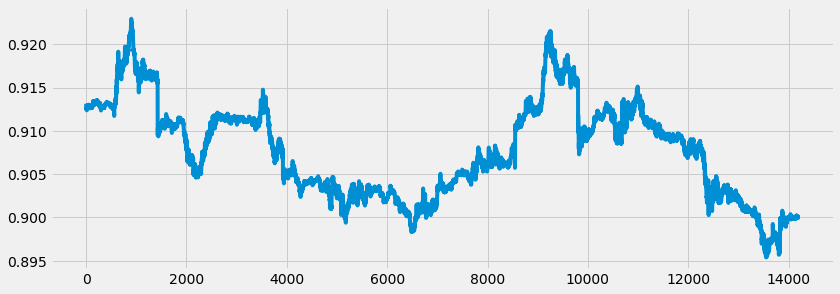

In [2]:
from read_data import read_data_to_df

import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

path = "C:\\Users\\grego\\interactivebrockers\\data\\EurGbpFx.txt"
df =  read_data_to_df(path)

plt.figure(figsize=(12.5,4.5))
plt.plot(df.open, label="EUR GBP")
plt.show()

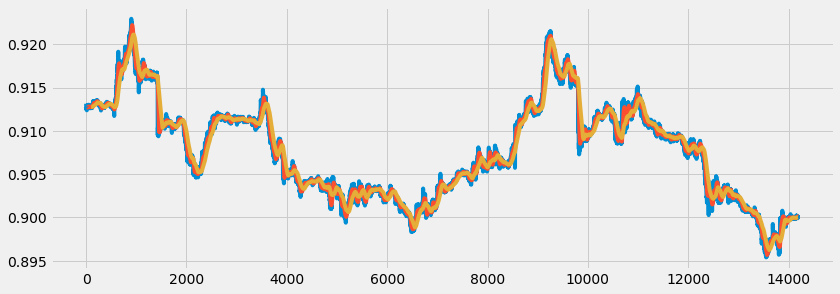

In [3]:
# moving average for the last 30 mi
sma30 = pd.DataFrame()
sma30["open"] = df.open.rolling(window=30).mean()

#logn term eaverage for 100 min
sma100 = pd.DataFrame()
sma100["open"] = df.open.rolling(window=100).mean()

#visualize the date
plt.figure(figsize=(12.5,4.5))
plt.plot(df.open, label="EUR GBP")
plt.plot(sma30.open, label="SMA 30")
plt.plot(sma100.open, label="SMA 100")
plt.show()

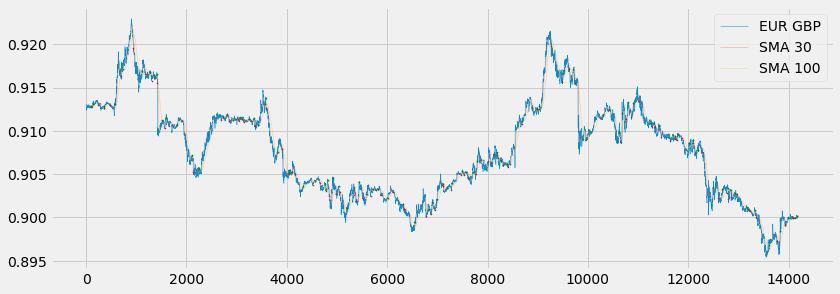

In [24]:
data = pd.DataFrame()
data["open"] = df.open
data["sma30"] = sma30.open
data["sma100"] = sma100.open

def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data.sma30[i] > data.sma100[i]:
            if flag != 1:
                sigPriceBuy.append(data.open[i])
                sigPriceSell.append(None)
                flag = 1
            else:
                sigPriceBuy.append(None)
                #sigPriceSell.append(data.open[i])
                sigPriceSell.append(None)
        elif data.sma30[i] < data.sma100[i]:
            if flag != 0:
                sigPriceBuy.append(None)
                sigPriceSell.append(data.open[i])
                flag = 0
            else:
                sigPriceBuy.append(None)
                sigPriceSell.append(None)
        else:
            sigPriceBuy.append(None)
            sigPriceSell.append(None)

    return (sigPriceBuy, sigPriceSell)

buy_sell = buy_sell(data)
data["buy_signal_price"] = buy_sell[0]
data["sell_signal_price"] = buy_sell[1]
data = data

plt.figure(figsize=(12.5,4.5))
plt.plot(data.open, label="EUR GBP", linewidth=0.5)
plt.plot(data.sma30, label="SMA 30", alpha=0.5, linewidth=0.5)
plt.plot(data.sma100, label="SMA 100", alpha=0.5, linewidth=0.5)
plt.plot(data.index, data["buy_signal_price"], marker="^", c="green", markersize=1)
plt.plot(data.index, data["sell_signal_price"], marker="*", c="red", markersize=1)
plt.legend()
plt.show()

In [59]:
def evaluate_mooving_average_deals(data):
    '''
    function evaluates deals made by mooving average algorythm
    :data:
    :return:
    '''
    deal_profits = []

    ds = data.\
        loc[(data.buy_signal_price.notna())|(data.sell_signal_price.notna()),:].\
        reset_index()[["index","buy_signal_price","sell_signal_price"]]

    n_deals = len(ds)//2
    for i in range(0, n_deals, 2):
        buy_rate = ds.buy_signal_price[i],
        sell_rate = ds.sell_signal_price[i+1]
        gbp_bought = 1*buy_rate
        eur_sold = gbp_bought / sell_rate
        
        deal_profits.append([ds.index[i],
                             ds.buy_signal_price[i],
                             ds.index[i+1],
                             ds.buy_signal_price[i]/ds.sell_signal_price[i+1],
                             round(ds.buy_signal_price[i]/ds.sell_signal_price[i+1]-1,6)])

    deal_profits = pd.DataFrame(deal_profits, columns=["step_bought",
                                                       "rate_bought",
                                                       "step_sold",
                                                       "rate_sold",
                                                       "profit"])
    return deal_profits

eval_ds = evaluate_mooving_average_deals(data)

In [63]:
eval_ds.profit.sum()*2000

5.008000000000001

In [62]:
import plotly.figure_factory as ff
import numpy as np
fig = ff.create_distplot([eval_ds.profit*1000], ["Profit per iteration"], bin_size=.2)
fig.show()